## Monte Carlo Problem

Please note this is the dumbest way to solve the problem.

In [1]:
import numpy as np

def dead_time_efficiency(time, dead_time, frequency, bin_resolution, hist_width):
    dead_time_bins = int(dead_time / bin_resolution)
    probability = frequency * bin_resolution
    num_bins = int(time / bin_resolution)

    bins = np.random.choice([0, 1], num_bins, p=[1 - probability, probability])
    photons = np.nonzero(bins)[0]
    total_count = len(photons)
                                              
    for photon in photons:
        bins[photon + 1:photon + dead_time_bins + 1] = 0

    counted_photons = np.nonzero(bins)[0]
    count = len(counted_photons)
    return count / total_count

In [2]:
trials = 100
efficiencies = np.array([dead_time_efficiency(time=1 * 10**-5, 
                                              dead_time=2 * 10**-7, 
                                              frequency=1 * 10**6,
                                              bin_resolution=10**-11, 
                                              hist_width=10**-4) 
                         for i in range(trials)])

error = efficiencies.std() / np.sqrt(trials)
'{0:.4f} +- {1:.4f}'.format(efficiencies.mean(), error)

'0.8261 +- 0.0113'

## Central Limit Theorem problem

0.4973 +- 0.2897


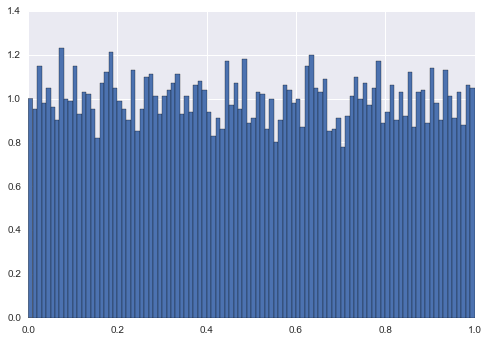

In [3]:
%matplotlib inline
import numpy as np

from scipy.stats import norm
from numpy import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')

data = np.random.uniform(size=10**4)
print('{:.4f} +- {:.4f}'.format(data.mean(), data.std()))
plt.hist(data, bins=100, normed=True);

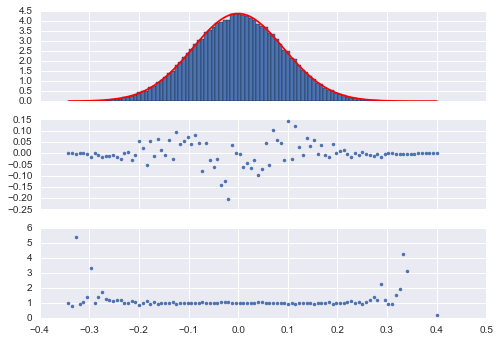

In [4]:
fig, axes = plt.subplots(nrows=3, sharex=True);

samples = 10
repetitions = 10**5
std = 1/np.sqrt(12 * samples)
#axes[0].set_xlim(-5 * std, 5 * std)

data = np.random.uniform(low=-0.5, high=0.5, size=(repetitions, samples))
means = np.mean(data, axis=1)
y, bin_edges, patches = axes[0].hist(means, bins=100, normed=True);
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
gauss = norm.pdf(bin_centers, scale=std)
axes[0].plot(bin_centers, gauss, color='red')
axes[1].plot(bin_centers, y - gauss, '.')
axes[2].plot(bin_centers, gauss / y, '.')

Remember that the central limit theorem states that the center of an averaged distribution converges to a gaussian, and that the tail of the gaussian and the distribution both converge to zero.

## A bespoke poisson distribution

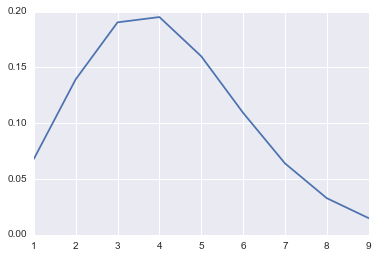

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from math import e, factorial

u = 4.1
x = range(1, 10)
my_poisson = [(u ** k) * (e ** -u) / factorial(k) for k in x]
plt.plot(x, my_poisson)

In [6]:
u = 100.1
x = range(1, 200)
my_poisson = [(u ** k) * (e ** -u) / factorial(k) for k in x]
plt.plot(x, my_poisson)

OverflowError: (34, 'Numerical result out of range')

This is an overflow error. To get around it we can take a log, employing either the gamma function or stirling's approximation.

3.35318299934e-05


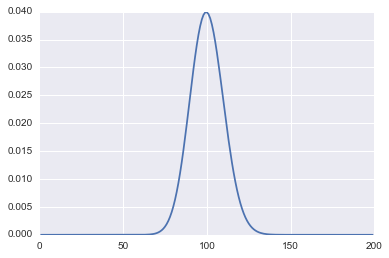

In [7]:
from numpy import log, pi
from scipy.stats import poisson
u = 100.1
x = range(1, 200)
log_poisson = [k * log(u) - u 
               - 0.5 * log(2 * pi * k) - k * (log(k) - 1) for k in x]
large_poisson = [e ** p for p in log_poisson]
plt.plot(x, large_poisson)
print(max(large_poisson - poisson.pmf(x, 100.1)))